In [ ]:
import numpy as np
import random as rd
import autograd.numpy as np
from matplotlib.pyplot import ion, draw, Rectangle, Line2D
import matplotlib.pyplot as plt
from CartPole import *
from sklearn import linear_model
from scipy import interpolate

# Task 1.4

### Linear Regression Rollout

In [ ]:
m = 500
TrainingCartPole = CartPole()
training_X = np.zeros(shape=(m, 4))
training_Y = np.zeros(shape=(m, 4))

for i in range(m):
    TrainingCartPole.setState([np.random.uniform(-50, 50), np.random.uniform(-10, 10), np.random.uniform(-(np.pi), np.pi),
                                  np.random.uniform(-15, 15)])
    training_X[i] = TrainingCartPole.getState()
    TrainingCartPole.performAction()
    training_Y[i] = TrainingCartPole.getState() - training_X[i]

C = np.zeros(shape=(4,4))
for i in range(4):
    C[i] = np.linalg.inv((training_X.T @ training_X)) @ training_X.T @ training_Y[:,i]
print(C)

def linear_reg(x, y):
    C = np.zeros(shape=(4, 4))
    C = np.linalg.lstsq(x,y)
    return C

# replacing model.predict(x_test) 
def predict_Y(C, X):
    y_predict = np.matmul(C,np.transpose(X))
m = 500
labels = ['Cart location', 'Cart Velocity', 'Pole Angle', 'Pole Velocity']
training_initial_state,training_y = np.zeros([m,4]),np.zeros([m,4])
trainC=CartPole(visual=False)
for i in range(m):
    trainC.setState([np.random.uniform(-30,30),np.random.uniform(-10,10),np.random.uniform(-np.pi,np.pi),np.random.uniform(-15,15)])
    training_initial_state[i] = trainC.getState()
    trainC.performAction()
    trainC.remap_angle
    training_y[i] =trainC.getState()-training_initial_state[i] 

print(training_initial_state)
print(training_y)
def Linear_Reg(x,y):
    model = linear_model.LinearRegression()
    x_train=x
    y_train=y
    model.fit(x_train,y_train)
    print(model.intercept_)
    print(model.coef_)
    c = model.coef_
    return(c)
c = Linear_Reg(training_initial_state,training_Y)

[[-2.35221868e-04  1.99624012e-01  4.05594318e-02  2.73775885e-03]
 [-1.49730098e-03  1.46735865e-03  1.67691386e-01  1.56364102e-02]
 [ 8.03489479e-04 -2.51562756e-03  1.70465992e-01  1.97604991e-01]
 [ 6.97385503e-03 -1.99602230e-02  1.11212298e+00 -8.18658570e-02]]
[[-25.63896657   0.61756993   0.11464698 -11.77936408]
 [ 16.94004069   2.07738364  -1.35157154   9.93829015]
 [ -8.43503213  -2.02232054   0.85891103   9.93253213]
 ...
 [ 22.55897533   4.43651076  -0.20283799  -1.33705304]
 [-19.47426024   9.58144679   0.26477211 -14.38893214]
 [ -0.8313613    8.76998137  -0.72819038  13.07774083]]
[[-0.05877132 -2.59173637 -2.39768841 -2.81519535]
 [ 0.28581991 -0.76310409  1.81708716 -1.02144559]
 [-0.11058945  2.78181658  2.57624783  6.49495039]
 ...
 [ 0.91314619  0.24102053 -0.53149223 -2.98076557]
 [ 1.66562008 -3.63933579 -2.89885753 -3.75488371]
 [ 1.79333414  1.80488549  2.67955254  1.31658541]]
[-0.08447861  0.103556   -0.10231726  0.19577947]
[[-0.0006229   0.00542296 -0.0026

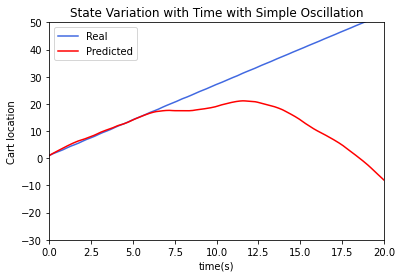

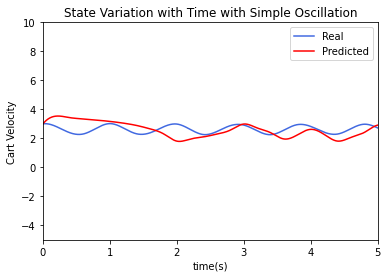

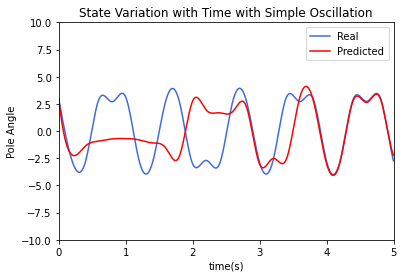

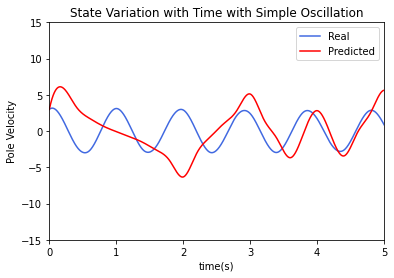

In [ ]:
x = CartPole(visual=False)
m = 500
labels = ['Cart location', 'Cart Velocity', 'Pole Angle', 'Pole Velocity']
real_states,pred_states,new_pred_state,actual_change = np.zeros([m,4]),np.zeros([m,4]),np.zeros([m,4]),np.zeros([m,4])
x.setState([0,8,np.pi,13])
initial_state=x.getState()
for i in range(m):
    real_states[i]= x.getState()
    #Perform update
    x.performAction()
    actual_change[i]=x.getState()-real_states[i]
    x.remap_angle()
z=CartPole()
z.setState([0,8,np.pi,13])
pred_c=np.zeros([m,4])
for i in range(m):
    pred_states[i]=z.getState()
    pred_change=np.matmul(c,pred_states[i])
    pred_c[i]=pred_change
    new_pred_state[i]=pred_change + pred_states[i]
    z.setState(new_pred_state[i])
    z.remap_angle()
t=np.arange(0,0.2*m,0.2)
def plot_time_evolution(Y_actual, Y_pred, n):
    labels = ['Cart location', 'Cart Velocity', 'Pole Angle', 'Pole Velocity']
    #fig, axs = plt.subplots(2)
    #fig.suptitle('4x4 State variation with time')
    t=np.arange(0,0.2*m,0.2)
    x_new = np.linspace(0,100,100000)
    sp = interpolate.make_interp_spline(t, Y_actual[:,0])
    y_new_1 = sp(x_new)
    sp2= interpolate.make_interp_spline(t, Y_pred[:,0])
    y_pred_1 = sp2(x_new)
    plt.xlabel('time(s)')
    plt.ylabel(labels[0])
    plt.xlim(0,20)
    plt.ylim(-30,50)
    plt.plot(x_new, y_new_1,color='royalblue',label='Real')
    plt.plot(x_new, y_pred_1,color='red', label = 'Predicted')
    plt.legend()
    plt.title("State Variation with Time with Simple Oscillation")
    plt.show()

    x_new = np.linspace(0,100,100000)
    sp = interpolate.make_interp_spline(t, Y_actual[:,1])
    y_new_1 = sp(x_new)
    sp2= interpolate.make_interp_spline(t, Y_pred[:,1])
    y_pred_2 = sp2(x_new)
    plt.xlabel('time(s)')
    plt.ylabel(labels[1])
    plt.xlim(0,5)
    plt.ylim(-5,10)
    plt.plot(x_new, y_new_1,color='royalblue',label='Real')
    plt.plot(x_new, y_pred_2,color='red', label = 'Predicted')
    plt.legend()
    plt.title("State Variation with Time with Simple Oscillation")
    plt.show()

    x_new = np.linspace(0,100,100000)
    sp = interpolate.make_interp_spline(t, Y_actual[:,2])
    y_new_3= sp(x_new)
    sp2= interpolate.make_interp_spline(t, Y_pred[:,2])
    y_pred_3 = sp2(x_new)
    plt.xlabel('time(s)')
    plt.ylabel(labels[2])
    plt.xlim(0,5)
    plt.ylim(-10,10)
    plt.plot(x_new, y_new_3,color='royalblue',label='Real')
    plt.plot(x_new, y_pred_3,color='red', label = 'Predicted')
    plt.legend()
    plt.title("State Variation with Time with Simple Oscillation")
    plt.show()

    x_new = np.linspace(0,100,100000)
    sp = interpolate.make_interp_spline(t, Y_actual[:,3])
    y_new_4 = sp(x_new)
    sp2= interpolate.make_interp_spline(t, Y_pred[:,3])
    y_pred_4 = sp2(x_new)
    plt.xlabel('time(s)')
    plt.ylabel(labels[3])
    plt.xlim(0,5)
    plt.ylim(-15,15)
    plt.plot(x_new, y_new_4,color='royalblue',label='Real')
    plt.plot(x_new, y_pred_4,color='red', label = 'Predicted')
    plt.legend()
    plt.title("State Variation with Time with Simple Oscillation")
    plt.show()

plot_time_evolution(real_states, pred_states, n)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=180073fb-9c10-447b-b721-e7b1d25fe36a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>